In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
class KMeans():
    def __init__(self, num_clusters, dist, max_iter = 1000):
        self.k = num_clusters
        self.dist = dist          # (n, f) * (k, f) -> (n, k)
        self.max_iter = max_iter
        self.labels = np.array([])
        self.centers = np.array([])
    
    def fit(self, X):
        num_items, num_features = X.shape
        
        idx = np.random.randint(0, num_items, (self.k,))
        self.centers = X[idx]
        
        for i in range(self.max_iter):            
            self.labels = self.dist(X, self.centers).argmin(axis = 1)
            old_centers = self.centers.copy()
            for j in range(self.k):
                if np.sum(self.labels == j) <= 0:
                    continue
                self.centers[j] = X[self.labels == j].mean(axis = 0)
            if np.square(old_centers - self.centers).sum() <= 1e-5:
                break
                
def EuclidianDistance(X, y):
    assert X.shape[1] == y.shape[1]
    X_2 = np.square(X).sum(axis = 1, keepdims = True)
    y_2 = np.square(y).sum(axis = 1, keepdims = True).T
    Xy = X @ y.T
    return np.sqrt(-2 * Xy + X_2 + y_2)

def CosineDistance(X, y, ep = 1.e-10):
    assert X.shape[1] == y.shape[1]
    Xy = X @ y.T
    X_norm = np.sqrt(np.square(X).sum(axis = 1, keepdims = True) + ep)
    y_norm = np.sqrt(np.square(y).sum(axis = 1, keepdims = True) + ep)
    return 1 - Xy / (X_norm @ y_norm.T)

In [3]:
X = np.random.randn(15,2)
y = np.array([[0,1],[1,1],[2,2]])
# print(CosineDistance(X, y))

In [13]:
kmeans = KMeans(4, CosineDistance)
kmeans.fit(X)

print(kmeans.labels, '\n', kmeans.centers)
print(silhouette_score(X,kmeans.labels,metric='euclidean'))

[1 3 3 1 0 0 2 1 2 3 1 1 0 3 2] 
 [[ 1.99925408 -1.01346733]
 [ 0.46673568  1.03623378]
 [-0.27980557 -1.51607618]
 [-0.79893281 -0.51388728]]
0.30332436247486444


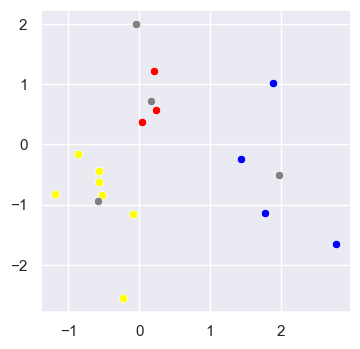

In [5]:
color = ['red', 'blue', 'yellow', 'green']
c_color = 'gray'
sns.set_theme(style='darkgrid')
plt.figure(dpi=100, figsize=(4,4))
for k in range(kmeans.k):
    x = X[kmeans.labels == k]
    sns.scatterplot(x=x[:,0], y=x[:,1], color = color[k])
sns.scatterplot(x=kmeans.centers[:,0], y=kmeans.centers[:,1], color = c_color)
plt.show()